In [1]:
import pandas as pd
import zipfile

In [16]:
df_zip=zipfile.ZipFile("/content/titanic.zip")
data=pd.read_csv(df_zip.open("train.csv"))
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [17]:
data=data.drop(columns="PassengerId")
data

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1    female  38.0      1      0          PC 17599  71.2833   C85        C  
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3    female  35.0      1      0            113803  53.1000  C123        S  
4      male  35.0      0      0            373450   8.0500   NaN        S  
..      ...   ...    ...    ...               ...      ...   ...      ...  
886    male  27.0      0      0            211536  13.0000   NaN        S  
887  female  19.0      0      0            112053  30.0000   B42        S  
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S  
889    male  26.0      0      0            111369  30.0000  C148        C  
890    male  32.0      0      0            370376   7.7500   NaN        Q  

[891 rows x 11 columns]

In [18]:
data.isnull().sum()/data.shape[0]*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [19]:
data=data.drop(columns="Cabin")
data.isnull().sum()/data.shape[0]*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [20]:
data.Age=data.Age.fillna(data.Age.mean())
data.Embarked=data.Embarked.fillna(data.Embarked.mode()[0])
data.isnull().sum()/data.shape[0]*100

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [27]:
data["Title"]=data.Name.str.split(".").str.get(0).str.split(",").str.get(1).str.strip()
data.Title

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [28]:
data.groupby("Title").count()

Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Title                                                                        
Capt                 1       1     1    1    1      1      1       1     1   
Col                  2       2     2    2    2      2      2       2     2   
Don                  1       1     1    1    1      1      1       1     1   
Dr                   7       7     7    7    7      7      7       7     7   
Jonkheer             1       1     1    1    1      1      1       1     1   
Lady                 1       1     1    1    1      1      1       1     1   
Major                2       2     2    2    2      2      2       2     2   
Master              40      40    40   40   40     40     40      40    40   
Miss               182     182   182  182  182    182    182     182   182   
Mlle                 2       2     2    2    2      2      2       2     2   
Mme                  1       1     1    1    1      1      1       1     1   
Mr                 517     517   517  517  517    517    517     517   517   
Mrs                125     125   125  125  125    125    125     125   125   
Ms                   1       1     1    1    1      1      1       1     1   
Rev                  6       6     6    6    6      6      6       6     6   
Sir                  1       1     1    1    1      1      1       1     1   
the Countess         1       1     1    1    1      1      1       1     1   

              Embarked  
Title                   
Capt                 1  
Col                  2  
Don                  1  
Dr                   7  
Jonkheer             1  
Lady                 1  
Major                2  
Master              40  
Miss               182  
Mlle                 2  
Mme                  1  
Mr                 517  
Mrs                125  
Ms                   1  
Rev                  6  
Sir                  1  
the Countess         1

In [29]:
fr_title=["Don","Donna","Mme","Ms","Mra","Mlle"]
eng_title=["Mr","Mrs","Mrs","Mrs","Mrs","Miss"]

for i in range(len(fr_title)):
  for j in range(len(eng_title)):
    if i==j:
      data["Title"]=data["Title"].str.replace(fr_title[i],eng_title[j])

data.groupby("Title").count()


Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Title                                                                        
Capt                 1       1     1    1    1      1      1       1     1   
Col                  2       2     2    2    2      2      2       2     2   
Dr                   7       7     7    7    7      7      7       7     7   
Jonkheer             1       1     1    1    1      1      1       1     1   
Lady                 1       1     1    1    1      1      1       1     1   
Major                2       2     2    2    2      2      2       2     2   
Master              40      40    40   40   40     40     40      40    40   
Miss               184     184   184  184  184    184    184     184   184   
Mr                 518     518   518  518  518    518    518     518   518   
Mrs                127     127   127  127  127    127    127     127   127   
Rev                  6       6     6    6    6      6      6       6     6   
Sir                  1       1     1    1    1      1      1       1     1   
the Countess         1       1     1    1    1      1      1       1     1   

              Embarked  
Title                   
Capt                 1  
Col                  2  
Dr                   7  
Jonkheer             1  
Lady                 1  
Major                2  
Master              40  
Miss               184  
Mr                 518  
Mrs                127  
Rev                  6  
Sir                  1  
the Countess         1

In [31]:
data["Title"]=data["Title"].apply(lambda x: x if x in ["Mr","Miss","Mrs","Master"] else "Others")
data.groupby("Title").count()

Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Embarked
Title                                                                         
Master        40      40    40   40   40     40     40      40    40        40
Miss         184     184   184  184  184    184    184     184   184       184
Mr           518     518   518  518  518    518    518     518   518       518
Mrs          127     127   127  127  127    127    127     127   127       127
Others        22      22    22   22   22     22     22      22    22        22

In [33]:
data=data.drop(columns=["Name","Ticket"])
data

Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      Title  
0        Mr  
1       Mrs  
2      Miss  
3       Mrs  
4        Mr  
..      ...  
886  Others  
887    Miss  
888    Miss  
889      Mr  
890      Mr  

[891 rows x 9 columns]

In [37]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [35]:
cats=["Pclass","Sex","Embarked","Title"]
lab_enc=LabelEncoder()
for i in cats:
  lab_enc.fit(data[i])
  data[i]=lab_enc.transform(data[i])

data

Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Title
0           0       2    1  22.000000      1      0   7.2500         2      2
1           1       0    0  38.000000      1      0  71.2833         0      3
2           1       2    0  26.000000      0      0   7.9250         2      1
3           1       0    0  35.000000      1      0  53.1000         2      3
4           0       2    1  35.000000      0      0   8.0500         2      2
..        ...     ...  ...        ...    ...    ...      ...       ...    ...
886         0       1    1  27.000000      0      0  13.0000         2      4
887         1       0    0  19.000000      0      0  30.0000         2      1
888         0       2    0  29.699118      1      2  23.4500         2      1
889         1       0    1  26.000000      0      0  30.0000         0      2
890         0       2    1  32.000000      0      0   7.7500         1      2

[891 rows x 9 columns]

In [36]:
y=data.Survived
X=data.drop(columns="Survived")

In [38]:
stdsc=StandardScaler()
X=stdsc.fit_transform(X)
X

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.50244517,
         0.58595414,  0.13293584],
       [-1.56610693, -1.35557354,  0.63878901, ...,  0.78684529,
        -1.9423032 ,  1.40654698],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.48885426,
         0.58595414, -1.14067529],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ..., -0.17626324,
         0.58595414, -1.14067529],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.04438104,
        -1.9423032 ,  0.13293584],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.49237783,
        -0.67817453,  0.13293584]])

In [41]:
from sklearn.model_selection import train_test_split as tts

In [42]:
X_train,X_test,y_train,y_test= tts(X,y,test_size=0.2,random_state=0)
X_train,X_val,y_train,y_val= tts(X_train,y_train,test_size=0.1,random_state=0)

In [44]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [45]:
model=Sequential()
model.add(Dense(64,input_dim=X_train.shape[1],activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [46]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
result=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50, verbose=0)

In [47]:
import matplotlib.pyplot as plt

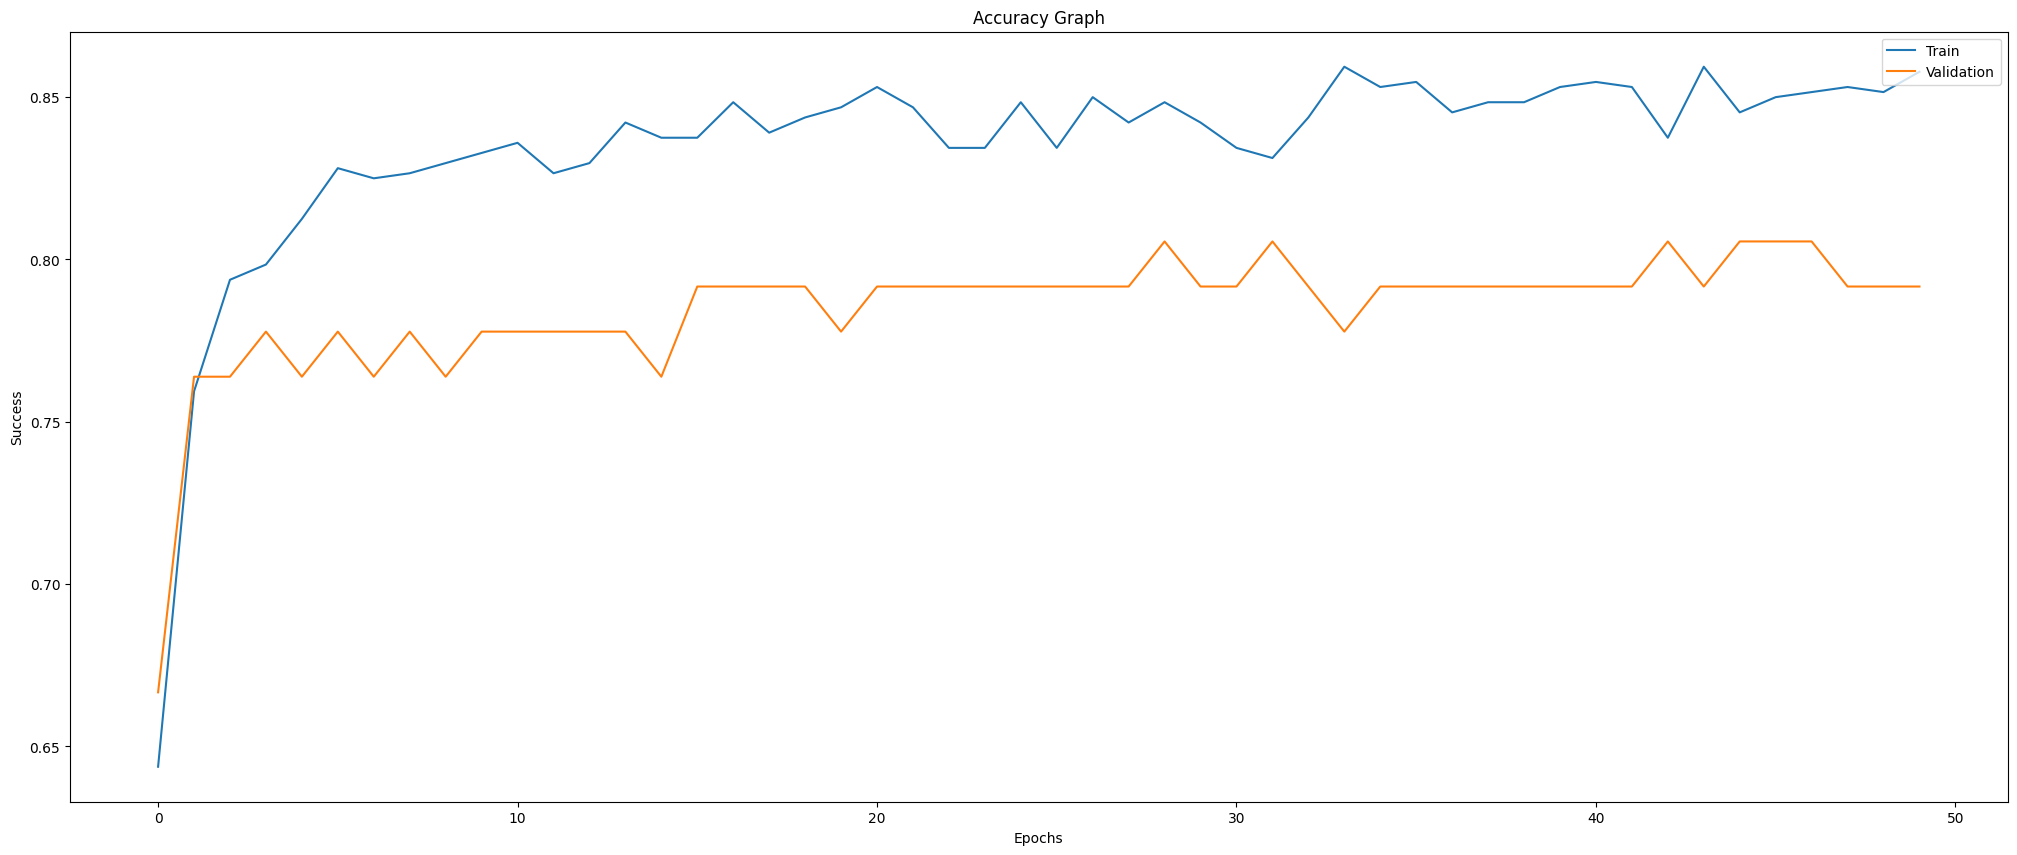

In [48]:
plt.figure(figsize=(25,10))
plt.plot(result.history["accuracy"])
plt.plot(result.history["val_accuracy"])
plt.title("Accuracy Graph")
plt.ylabel("Success")
plt.xlabel("Epochs")
plt.legend(["Train","Validation"],loc="upper right")
plt.show()

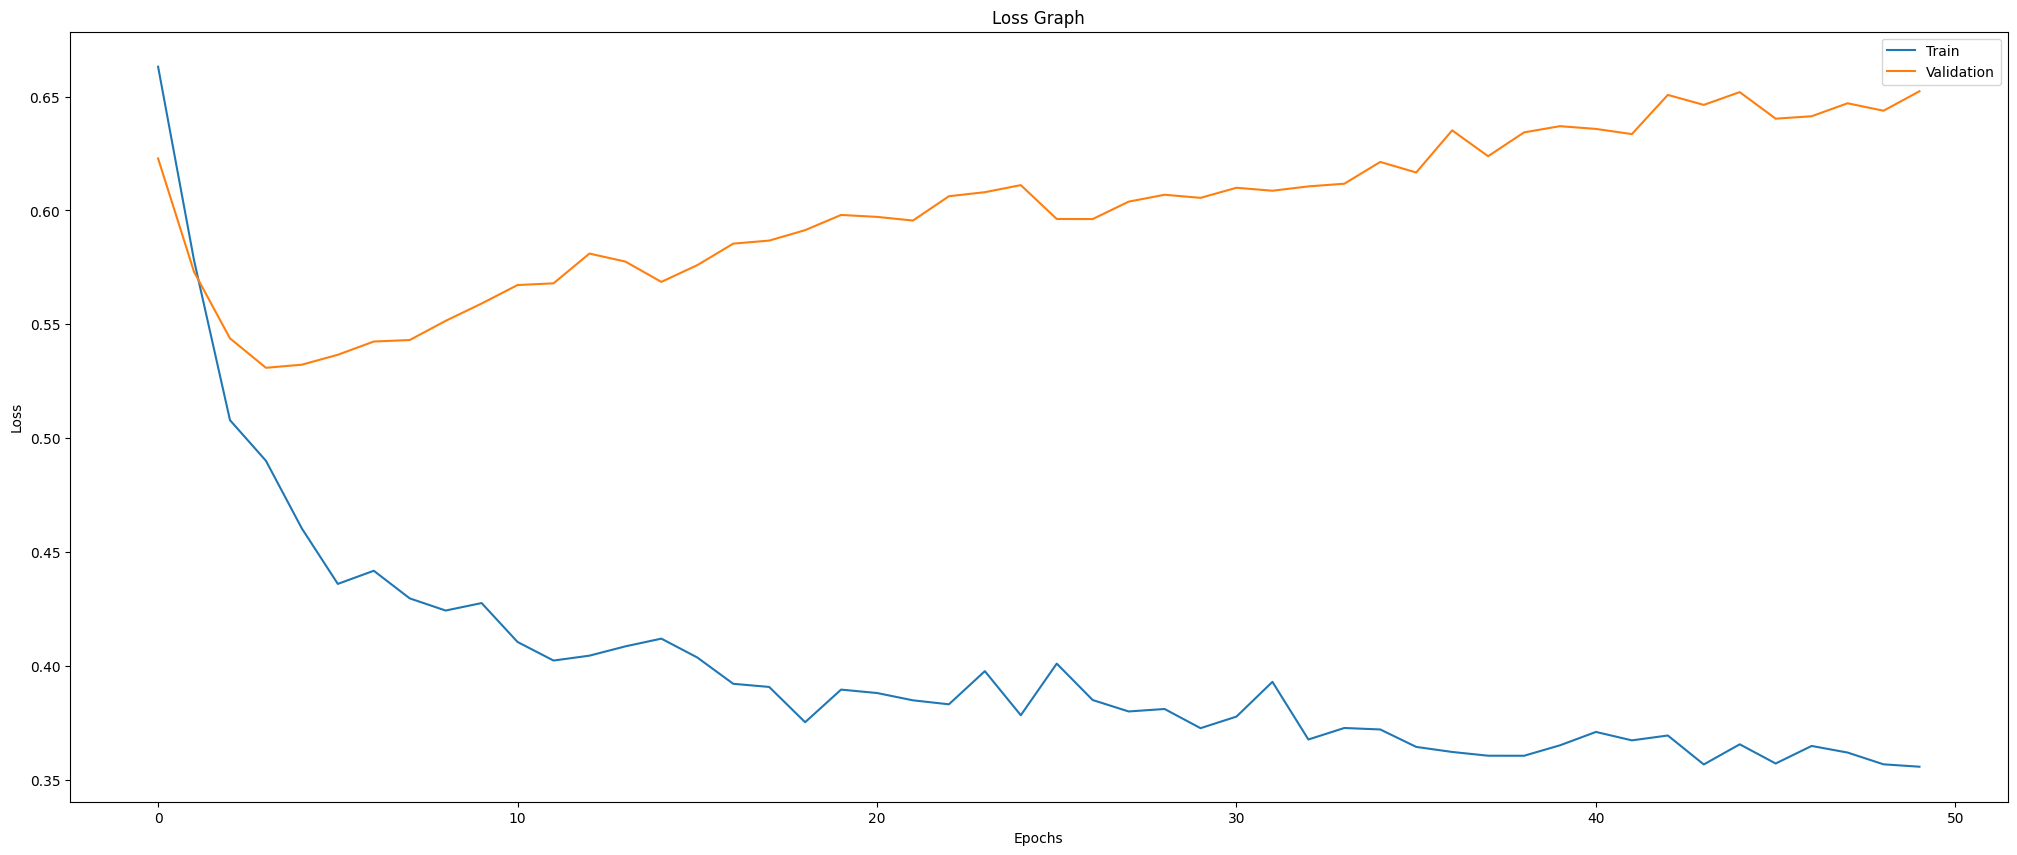

In [49]:
plt.figure(figsize=(25,10))
plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])
plt.title("Loss Graph")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Train","Validation"],loc="upper right")
plt.show()
